In [1]:
from glob import glob
import tensorflow as tf
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
sub, ses, ch, ex = 'SD010','01','LA1','welcome_normed'

In [3]:
def window_std(array, win_len):
    new_array = np.zeros(len(array))
    for i in range(len(array)):
        new_array[i] = np.std(array[i:i+win_len])
    return new_array

Text(0.5, 0, 'Time [ms]')

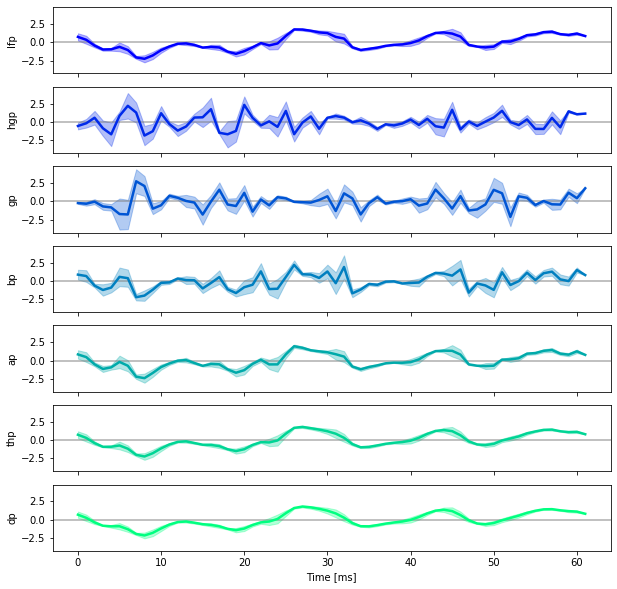

In [5]:
bands = ['dp','thp','ap','bp','gp','hgp','lfp']
fig, axes = plt.subplots(len(bands), 1, figsize=(10, 10), sharex=True, sharey=True)
colors = plt.get_cmap('winter_r')(np.linspace(0, 1, len(bands)))
for band, color, ax in zip(bands, colors, axes.ravel()[::-1]):
    fpath = 'Figure1/sub-SD010_ch-LA1_band-%s_welcome_normed_MNE.pkl'%band
    with open(fpath, 'rb') as f:
        mne_stim_data = pickle.load(f)
    
    resp = np.real(mne_stim_data['resp'])
    line = stats.zscore(resp)
    se = window_std(line,3)
    ax.axhline(0, linestyle='-', color='grey', linewidth=1.6, alpha=0.6)
    ax.fill_between(range(len(line)), line-se, line+se, color=color, alpha=0.3)
    ax.plot(line, label=band, color=color, linewidth=2.5)
    ax.set_ylabel(band)

axes.ravel()[-1].set_xlabel('Time [ms]')